<a href="https://colab.research.google.com/github/Sigerip/Curso-CONCICAT/blob/main/CONCICAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização dos Resultados Graficamente

### Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo para os gráficos
sns.set_theme(style="whitegrid")

### Dados importados do nosso [repositório do github](https://github.com/Sigerip/Curso-CONCICAT/tree/main/Previs%C3%B5es%20e%20m%C3%A9tricas).

In [ ]:
# --- DADOS DE PREVISÕES ---
previsoes_urls = {
    'ARIMA': "https://raw.githubusercontent.com/Sigerip/Curso-CONCICAT/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/ARIMA_previsoes_intervalos_arima.csv",
    'ETS': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/ETS_previsoes.csv",
    'LC': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/LC_prev_total.csv",
    'NNAR': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/NNAR_previsoes.csv",
    'Media': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/prev_media_simples.csv",
    'Ponderada': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/previsoes_ponderada.csv"
}

dfs_previsoes = []
for modelo, url in previsoes_urls.items():
    df = pd.read_csv(url)
    df.columns = df.columns.str.lower()
    df['modelo'] = modelo
    if 'previsao_final' in df.columns:
        df.rename(columns={'previsao_final': 'previsto'}, inplace=True)
    dfs_previsoes.append(df)

previsoes_consolidadas = pd.concat(dfs_previsoes, ignore_index=True)
previsoes_consolidadas = previsoes_consolidadas[['ano', 'sexo', 'idade', 'previsto', 'modelo']]

# --- DADOS DE ERROS ---
erros_urls = {
    'ARIMA': "https://raw.githubusercontent.com/Sigerip/Curso-CONCICAT/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/ARIMA_modelos_metricas_arima.csv",
    'ETS': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/ETS_metricas.csv",
    'LC': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/LC_metricas_por_sexo.csv",
    'NNAR': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/NNAR_metricas.csv",
    'Media': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/metrica_media_simples.csv",
    'Ponderada': "https://github.com/Sigerip/Curso-CONCICAT/raw/refs/heads/main/Previs%C3%B5es%20e%20m%C3%A9tricas/metricas_ponderada.csv"
}

dfs_erros = []
for modelo, url in erros_urls.items():
    df = pd.read_csv(url)
    df.columns = df.columns.str.lower()
    df['modelo'] = modelo
    dfs_erros.append(df)

erros_consolidados = pd.concat(dfs_erros, ignore_index=True)
erros_long = erros_consolidados.melt(
    id_vars=['sexo', 'idade', 'modelo'],
    value_vars=['rmse', 'smape', 'mae'],
    var_name='metrica',
    value_name='valor'
)
erros_long['metrica'] = erros_long['metrica'].str.upper()

print("Dados carregados com sucesso!")
print("\nPrimeiras linhas dos dados de erros:")
print(erros_long.head())
print("\nPrimeiras linhas dos dados de previsões:")
print(previsoes_consolidadas.head())

Dados carregados com sucesso!

Primeiras linhas dos dados de erros:
       sexo  idade modelo metrica     valor
0  Mulheres      0  ARIMA    RMSE  0.001236
1  Mulheres      1  ARIMA    RMSE  0.000010
2  Mulheres      5  ARIMA    RMSE  0.000006
3  Mulheres     10  ARIMA    RMSE  0.000003
4  Mulheres     15  ARIMA    RMSE  0.000004

Primeiras linhas dos dados de previsões:
    ano   sexo  idade  previsto modelo
0  2016  Ambos      0  0.012313  ARIMA
1  2016  Ambos      1  0.000526  ARIMA
2  2016  Ambos      5  0.000230  ARIMA
3  2016  Ambos     10  0.000321  ARIMA
4  2016  Ambos     15  0.001332  ARIMA


### Aplicando filtros para gerar os gráficos.

In [ ]:
# Altere os valores abaixo para filtrar os gráficos
sexo_selecionado = 'Homens'       # Opções: 'Homens', 'Mulheres', 'Ambos'
metrica_selecionada = 'RMSE'        # Opções: 'RMSE', 'SMAPE', 'MAE'
ano_selecionado = 2019              # Opções: anos disponíveis nos dados (2016 a 2019)

# Filtrar os dataframes com base nas seleções
df_erros_filtrado = erros_long[
    (erros_long["sexo"] == sexo_selecionado) &
    (erros_long["metrica"] == metrica_selecionada)
]

df_previsoes_filtrado = previsoes_consolidadas[
    (previsoes_consolidadas['sexo'] == sexo_selecionado) &
    (previsoes_consolidadas['ano'] == ano_selecionado)
]

print(f"Filtros aplicados: Sexo={sexo_selecionado}, Métrica={metrica_selecionada}, Ano={ano_selecionado}")

Filtros aplicados: Sexo=Homens, Métrica=RMSE, Ano=2019


### Box Plot da métrica de erro entre os modelos.

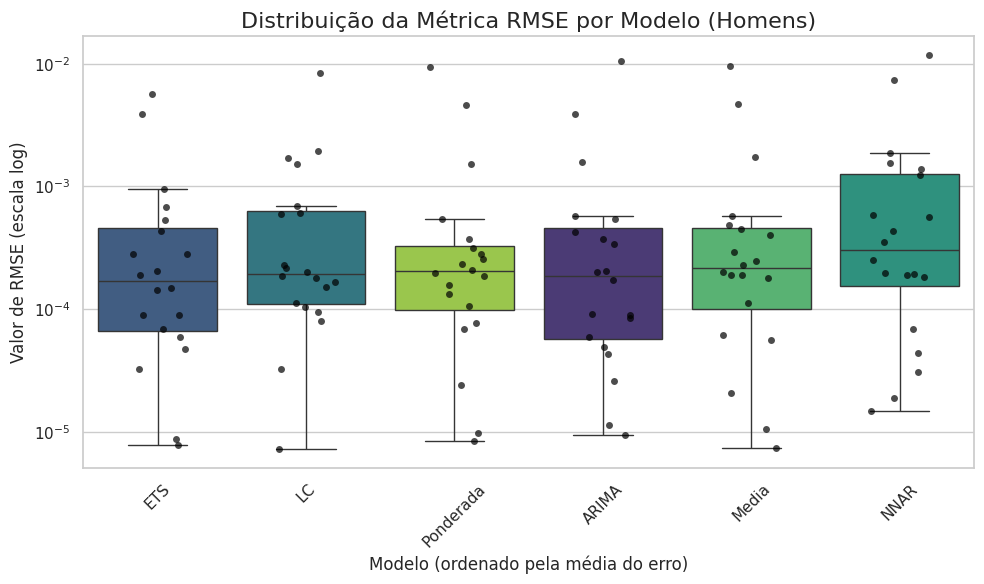

In [ ]:
plt.figure(figsize=(10, 6))

# Ordena os modelos pela média do erro para melhor visualização
ordem_modelos = df_erros_filtrado.groupby('modelo')['valor'].mean().sort_values().index

# Cria o boxplot paleta de cores viridis

sns.boxplot(
    data=df_erros_filtrado,
    x='modelo',
    y='valor',
    order=ordem_modelos,
    palette='viridis',
    hue= 'modelo',
    showfliers=False # Oculta outliers do boxplot para não sobrepor com o stripplot
)

# Adiciona os pontos individuais sobre o boxplot
sns.stripplot(
    data=df_erros_filtrado,
    x='modelo',
    y='valor',
    order=ordem_modelos,
    color='black',
    alpha=0.7,
    jitter=0.2
)

plt.yscale('log') # Aplica a escala logarítmica
plt.title(f'Distribuição da Métrica {metrica_selecionada} por Modelo ({sexo_selecionado})', fontsize=16)
plt.xlabel('Modelo (ordenado pela média do erro)', fontsize=12)
plt.ylabel(f'Valor de {metrica_selecionada} (escala log)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparação do erro entre os modelos.

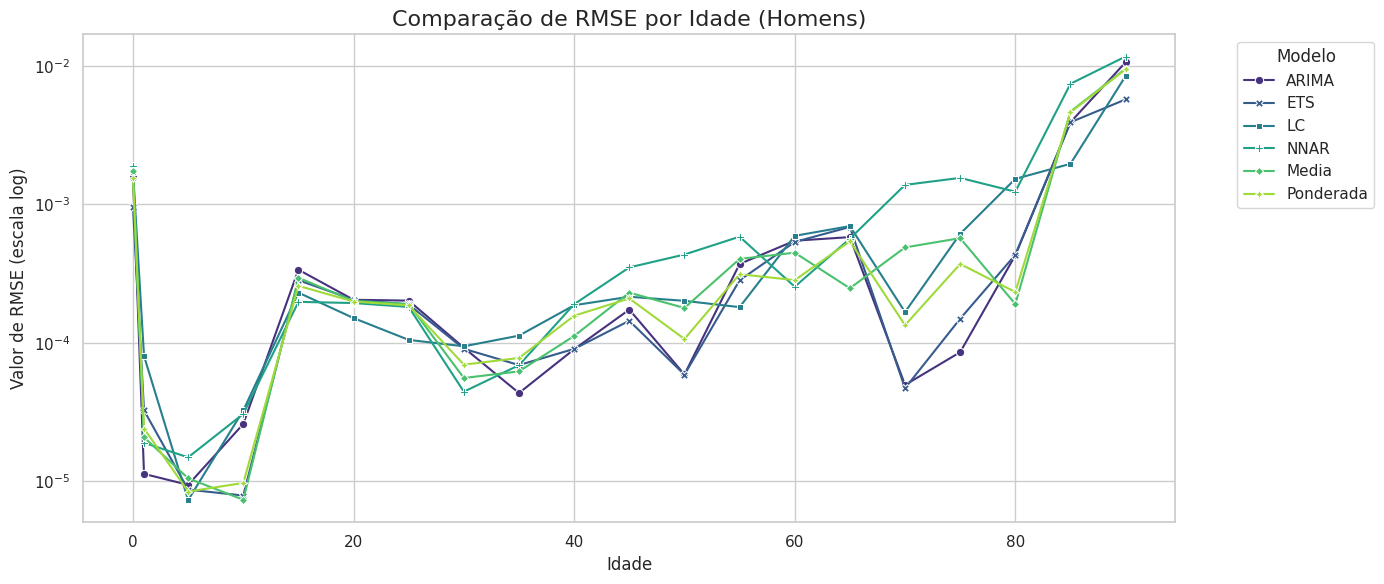

In [ ]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=df_erros_filtrado,
    x='idade',
    y='valor',
    hue='modelo',
    style='modelo',
    markers=True,
    dashes=False,
    palette='viridis',
)

plt.yscale('log') # Aplica a escala logarítmica
plt.title(f'Comparação de {metrica_selecionada} por Idade ({sexo_selecionado})', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel(f'Valor de {metrica_selecionada} (escala log)', fontsize=12)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Projeção da curva de mortalidade em escala log.

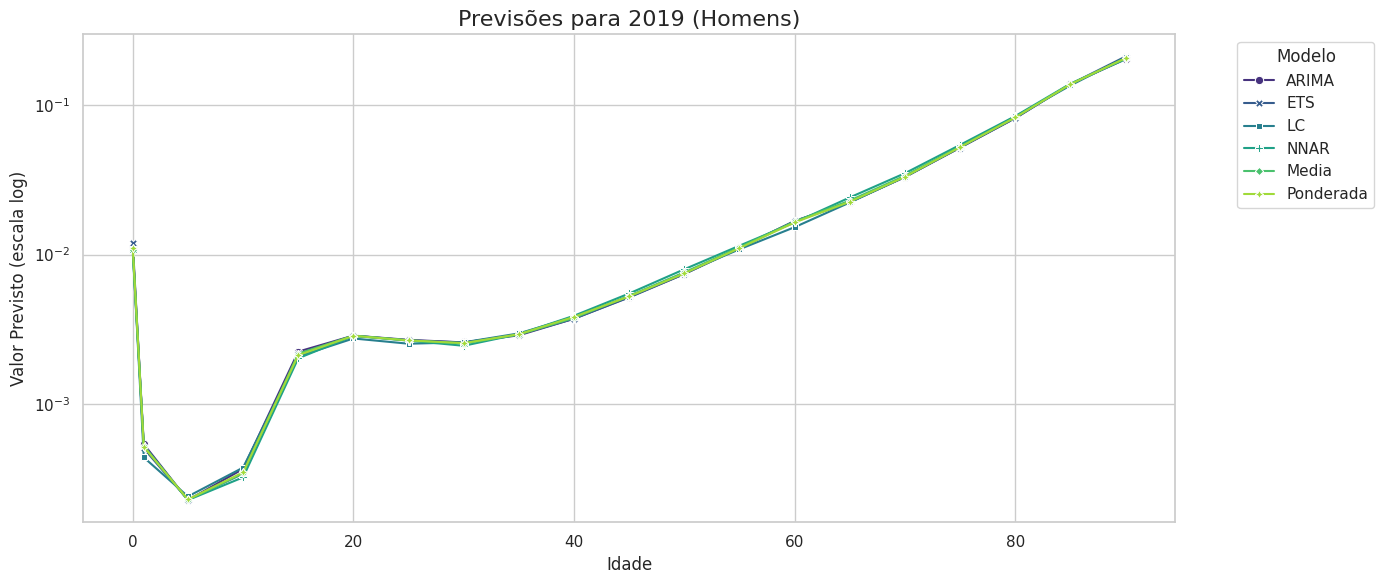

In [ ]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=df_previsoes_filtrado,
    x='idade',
    y='previsto',
    hue='modelo',
    style='modelo',
    markers=True,
    dashes=False,
    palette='viridis'
)

plt.yscale('log') # Aplica a escala logarítmica
plt.title(f'Previsões para {ano_selecionado} ({sexo_selecionado})', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Valor Previsto (escala log)', fontsize=12)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()